In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('kc_house_data.csv', sep=(','))

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

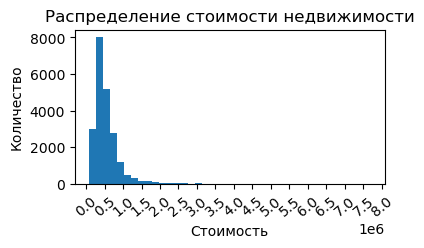

In [62]:
plt.figure(figsize=(4,2))
plt.hist(df['price'], bins=40)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.locator_params (axis='x', nbins= 20)
plt.locator_params (axis='y', nbins= 7 )
plt.xticks(rotation=40);

Больше всего домов в продаже стоимостью до 600 тыс.

### 1.3 Изучите распределение квадратуры жилой

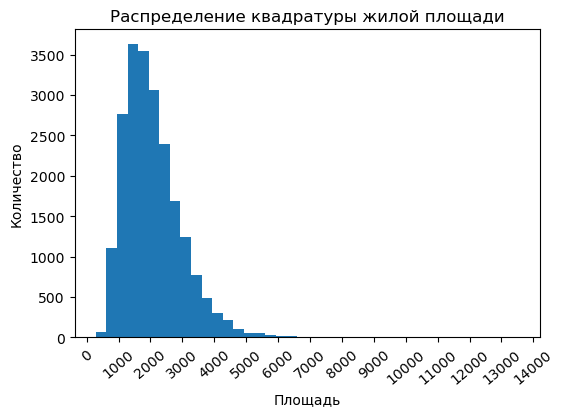

In [53]:
plt.figure(figsize=(6,4))
plt.hist(df['sqft_living'],bins=40)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.locator_params (axis='x', nbins= 24)
plt.locator_params (axis='y', nbins= 14 )
plt.xticks(rotation=40);

Больше всего продается домов с площадью от 1000 до 2500

### 1.4 Изучите распределение года постройки

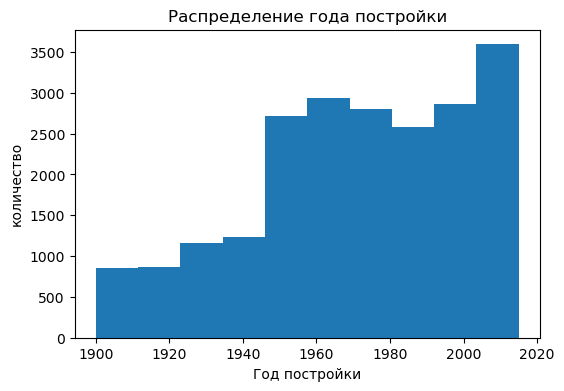

In [69]:
plt.figure(figsize=(6,4))
plt.hist(df['yr_built'])
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('количество');

Больше всего продаж новых домов, старых домов проданно мало, продажи домов постройки 1950-2005 распределены равномерно

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

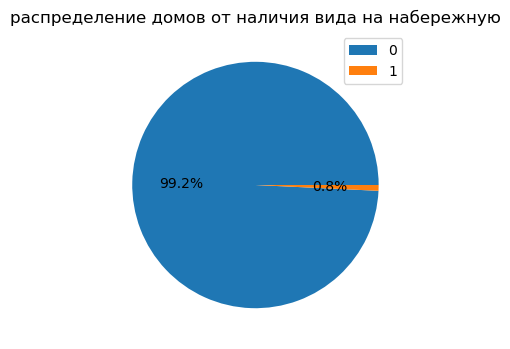

In [72]:
data=df['waterfront'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(data, autopct='%1.1f%%')
plt.title('распределение домов от наличия вида на набережную')
plt.legend(data.index);

Домов с видом на воду менее 1 %

### 2.2 Изучите распределение этажей домов

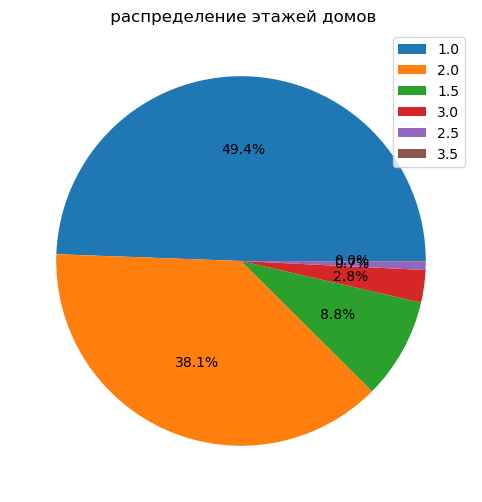

In [68]:
data2=df['floors'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(data2, autopct='%1.1f%%')
plt.title(' распределение этажей домов')
plt.legend(data2.index);

В продаже преобладают 1-этажные и 1-этажные дома

### 2.3 Изучите распределение состояния домов

In [78]:
data3=df['condition'].value_counts()
data3

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

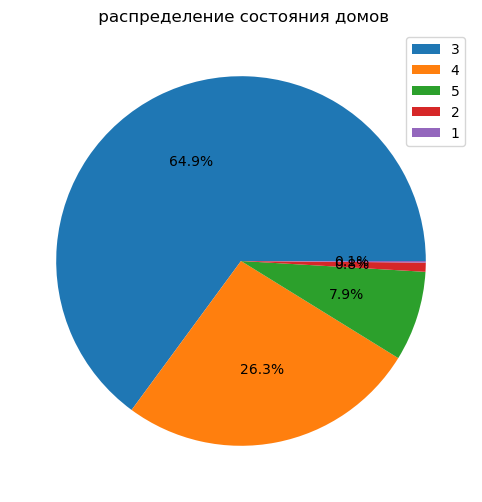

In [76]:
plt.figure(figsize=(10,6))
plt.pie(data3, autopct='%1.1f%%')
plt.title(' распределение состояния домов')
plt.legend(data3.index);

Большая часть домов находится в удовлетворительном состоянии

## 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [82]:
corr_matrix=df.corr()
corr_matrix = np.round(corr_matrix,1)
corr_matrix[np.abs(corr_matrix)<0.3]=0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


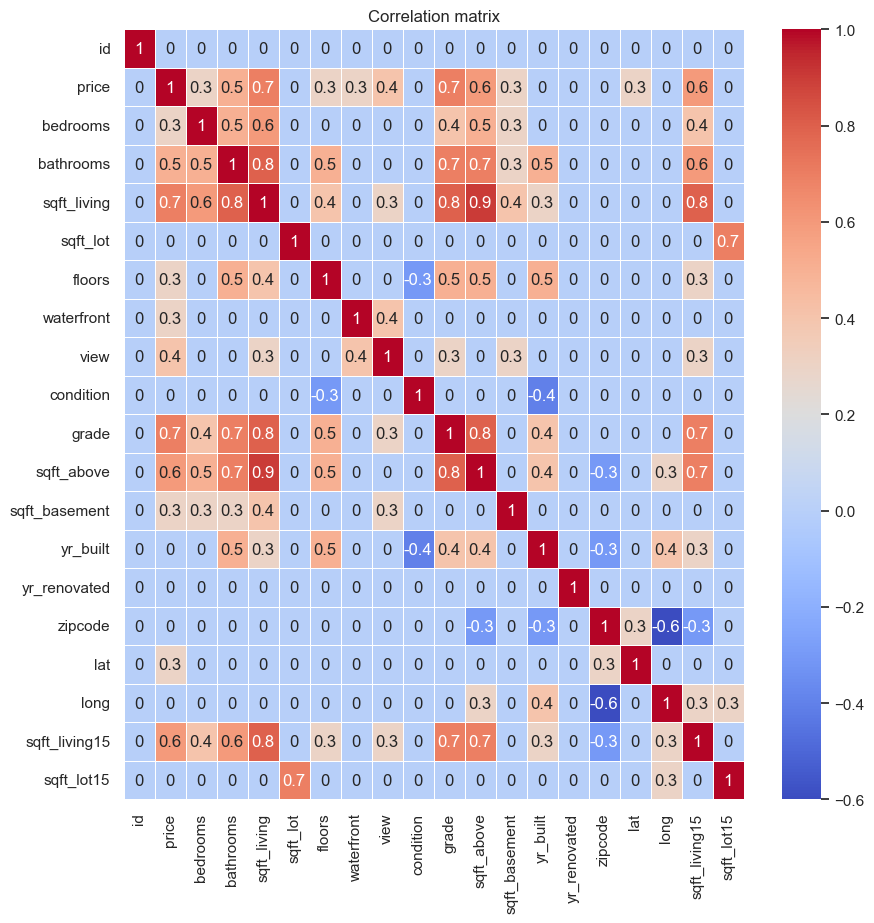

In [86]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

Наибольшая зависимость видна цена от жилой площади дома,
цена от конструкции здания,
количество ванных комнат от жилой площади,
жилая площадь от жилой площади 15 соседей, 
конструкция здания и кол-во площади выше земли от жилой площади 15 соседей, 
конструкция здания от кол-ва площади выше земли

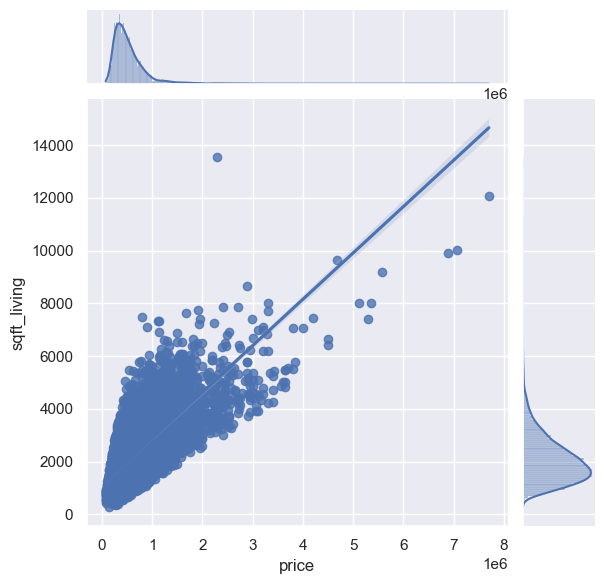

In [93]:
sns.jointplot(x=df['price'],y=df['sqft_living'], kind='reg');

Видна линейная зависимость стоимости дома от жилой площади

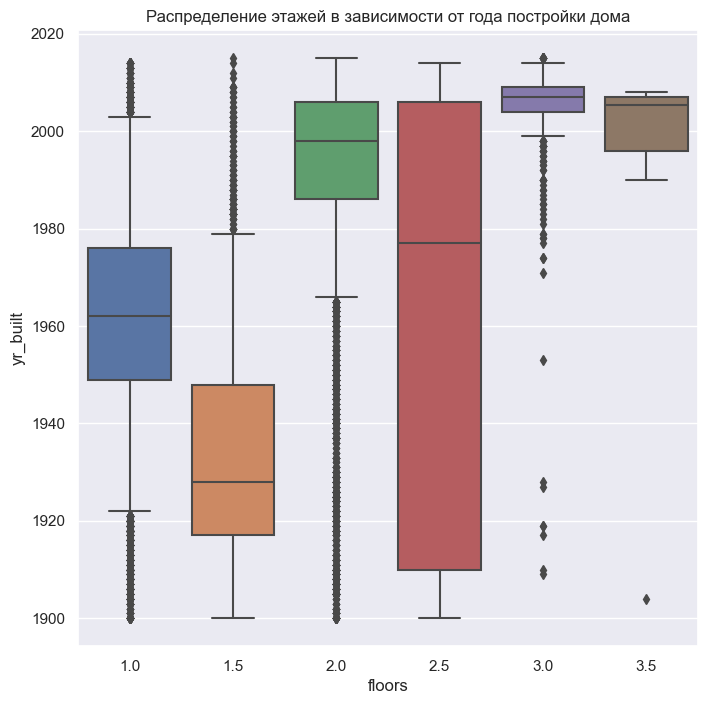

In [100]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['yr_built'], x=df['floors'], whis=1)
plt.xlabel('floors')
plt.ylabel('yr_built')
plt.title('Распределение этажей в зависимости от года постройки дома');

Последние года, становятся популярными дома в 3 и 3,5 этажа, на протяжении всего времени не теряют свою популярность дома в 2, 5 этажа

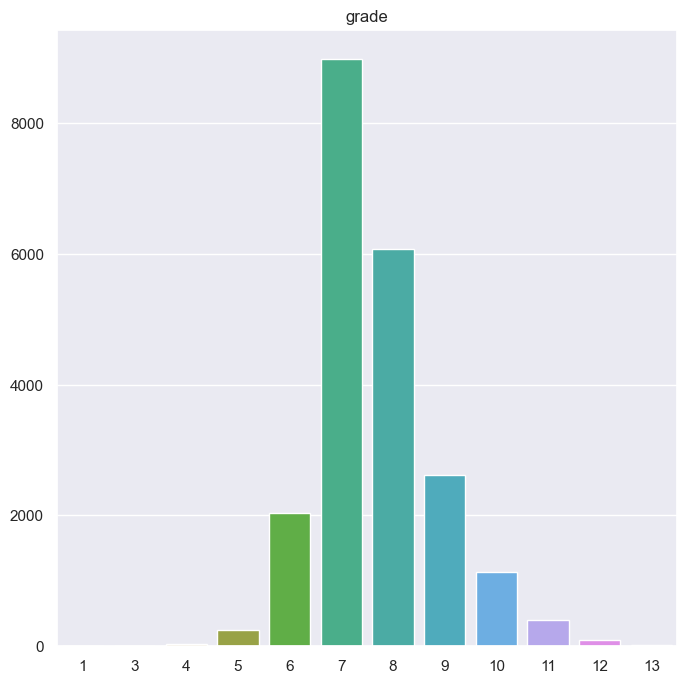

In [103]:
counts=df['grade'].value_counts()
plt.figure(figsize=(8,8))
plt.title('grade')
sns.barplot(x=counts.index, y=counts.values)
plt.show()

Большинство домов имеет средний уровень конструкции и дизайна

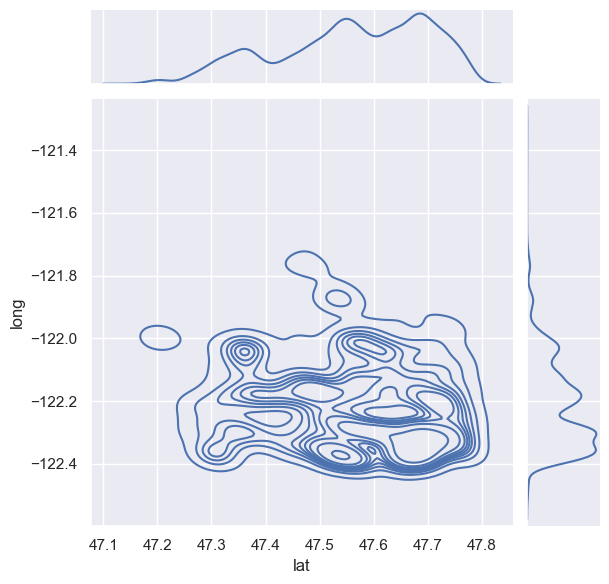

In [106]:
sns.jointplot(x=df['lat'],y=df['long'], kind='kde');

Можно сказать, что дома распределенны относительно равномерно, по изучаемой местности